# calculate the FWHM of spectra from Bacteria-30

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from torchvision import transforms 
import torch.nn.functional as F
def resize(inp, new_length=1024):
    b, l = inp.shape
    inp = transforms.ToTensor()(inp)
    inp = transforms.Resize([1, new_length])(inp.reshape(b, 1, l))
    inp = F.adaptive_avg_pool1d(inp, 256).squeeze()
    # print(inp.shape)
    return inp

In [3]:
data = np.r_[
            #  resize(np.load('./datasets/RRUFF/train_x.npy')), 
             resize(np.load('./datasets/Bacteria/train_x.npy')),
            #  resize(np.load('./datasets/COV/train_x.npy')),
            #  resize(np.load('./datasets/FunctionalGroups/train_x.npy')),
            #  resize(np.load('./datasets/Marine/train_x.npy')),
            ]
print(data.shape)

(60000, 256)


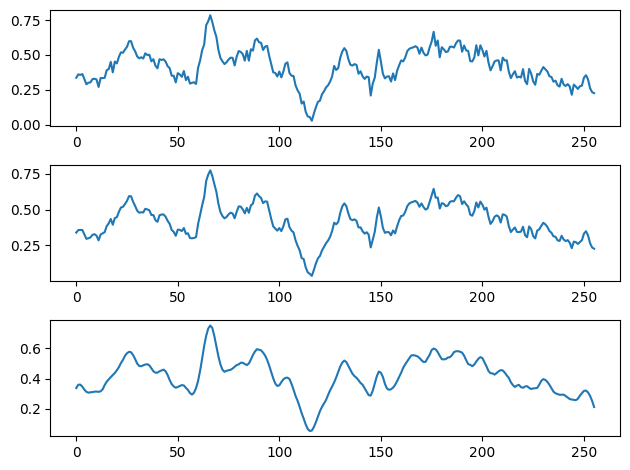

In [4]:
from scipy.signal import chirp, find_peaks, peak_widths, savgol_filter
plt.figure(tight_layout=True)
plt.subplot(311)
plt.plot(data[0])
plt.subplot(312)
x = resize(data[:1]).flatten()
plt.plot(x)
plt.subplot(313)
x = savgol_filter(x, 9, 3)
plt.plot(x)


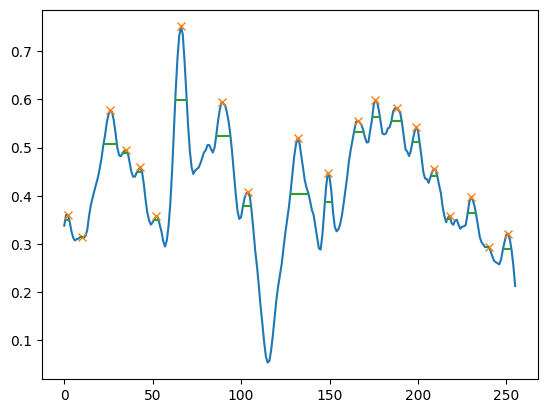

In [5]:
peaks, _ = find_peaks(x, distance=8,)
results_half = peak_widths(x, peaks, rel_height=0.5, wlen=30,)
# results_full = peak_widths(x, peaks, rel_height=1)

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
# plt.hlines(*results_full[1:], color="C3")
plt.show()

torch.Size([60000, 256])
torch.Size([569, 256])
torch.Size([372, 256])
torch.Size([8494, 256])


/tmp/ipykernel_51220/1042318652.py:16: PeakPropertyWarning: some peaks have a prominence of 0
  results_half = peak_widths(x, peaks, rel_height=0.5, wlen=30)
/tmp/ipykernel_51220/1042318652.py:16: PeakPropertyWarning: some peaks have a width of 0
  results_half = peak_widths(x, peaks, rel_height=0.5, wlen=30)


torch.Size([7800, 256])


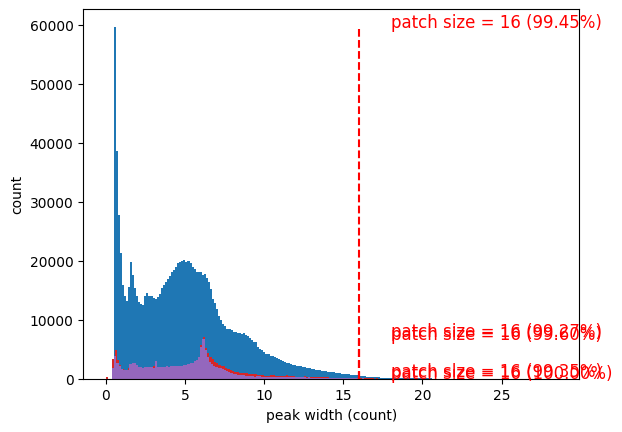

In [6]:
datas = [resize(np.load('./datasets/Bacteria/train_x.npy')), 
        resize(np.load('./datasets/Marine/train_x.npy')),
        resize(np.load('./datasets/COV/train_x.npy')),
        resize(np.load('./datasets/RRUFF/train_x.npy')),
        resize(np.load('./datasets/FunctionalGroups/train_x.npy')),
        ]
hists = []
percentages = []
for data in datas:
    res = []
    print(data.shape)
    for i in range(data.shape[0]):
        x = data[i]
        x = savgol_filter(x, 11, 3)
        peaks, _ = find_peaks(x, distance=8)
        results_half = peak_widths(x, peaks, rel_height=0.5, wlen=30)
        res += results_half[0].tolist()

    tmp = np.stack(res)
    h = plt.hist(tmp, bins=200)
    plt.xlabel('peak width (count)')
    plt.ylabel('count')
    hists.append(h)
    # plot a vertical line at target_num (patch size = 16)
    target_num = 16
    plt.vlines(target_num, 0, h[0].max(), color='r', linestyle='--')
    plt.text(target_num+2, h[0].max(), f'patch size = 16 ({tmp[tmp<=16].shape[0]/tmp.shape[0]*100:.2f}%)', color='r', fontsize=12)
    percentages.append(tmp[tmp<=16].shape[0]/tmp.shape[0]*100)


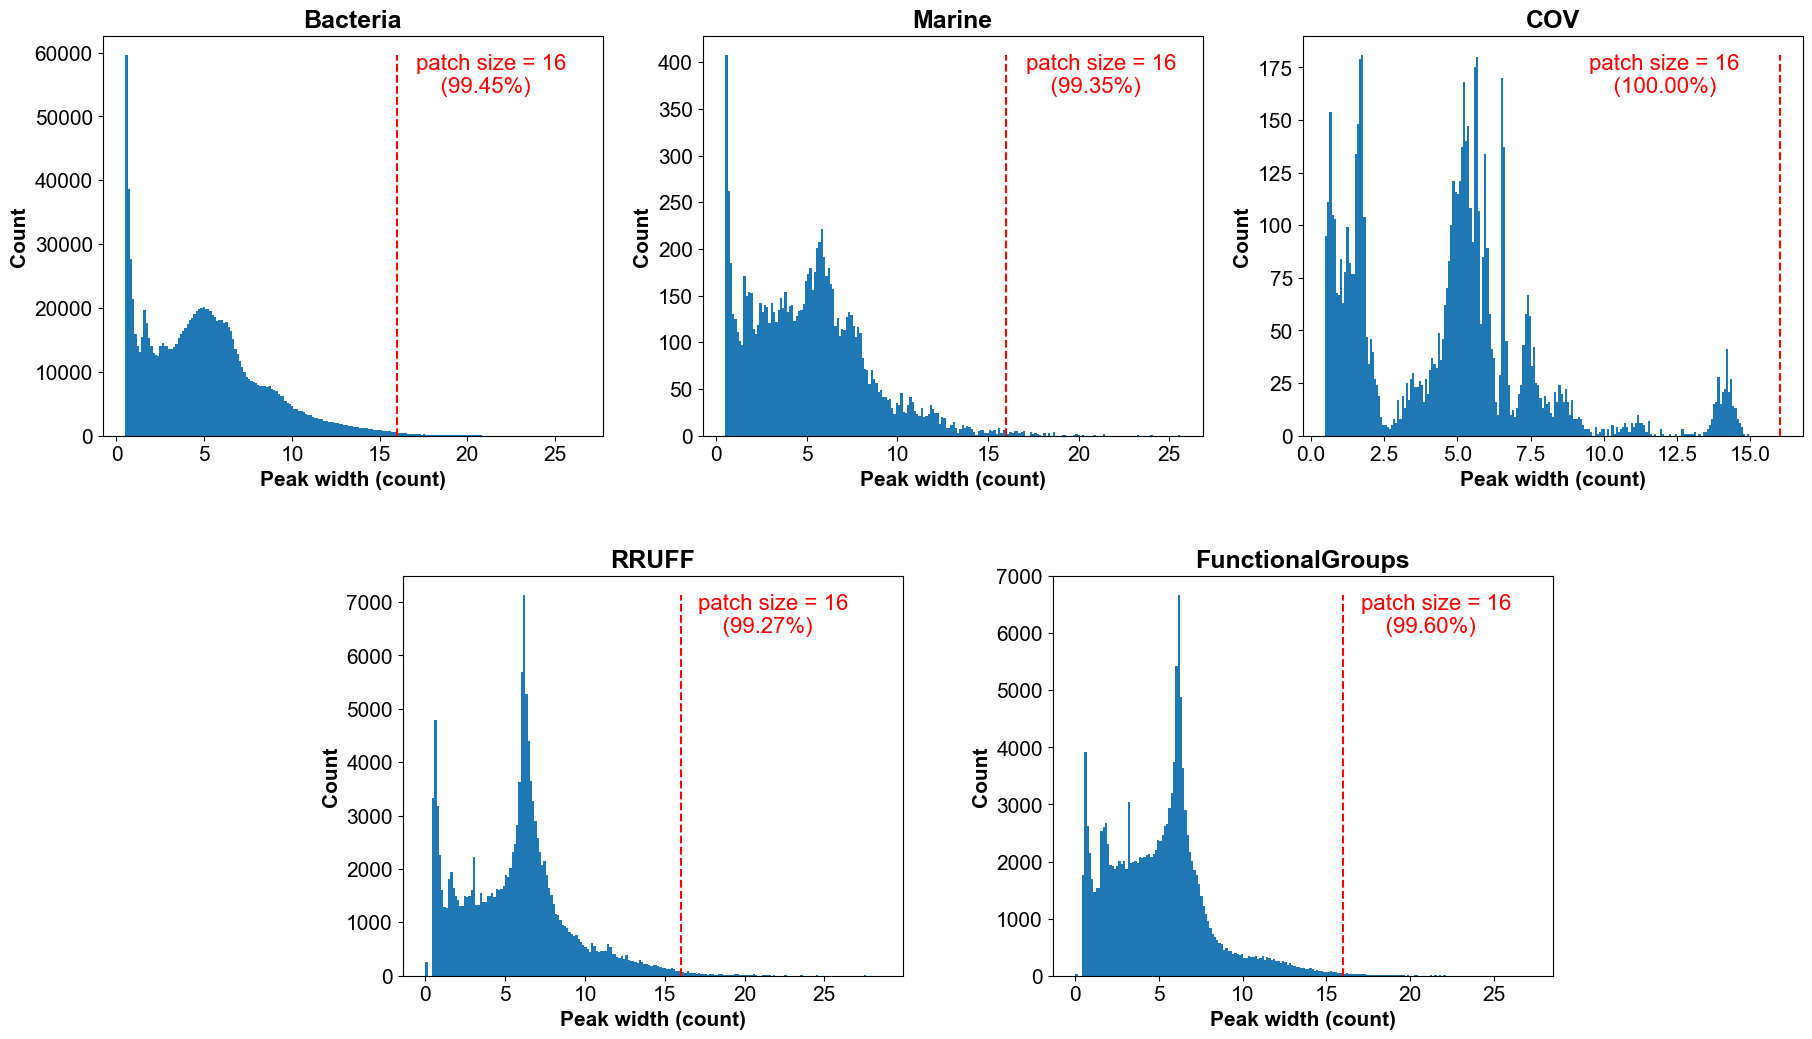

In [8]:
# create a 3*2 figure by hists and the last subfig is empty

# legend_font = {'family' : 'Arial', 'weight' : 'normal', 'size': 23}
# font=dict(family='Arial',style='normal',weight='normal',color='r',size=16)
plt.rc('font',family='Arial', size=15)
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
count = 1
for i, ax in enumerate(axs.flatten()):
    if count == 6:
        break
    ax.set_title(['Bacteria', 'Marine', 'COV', 'RRUFF', 'FunctionalGroups'][i], weight='bold')
    ax.set_xlabel('Peak width (count)',weight='bold')
    ax.set_ylabel('Count',weight='bold')
    ax.bar(hists[i][1][:-1], hists[i][0], width=np.diff(hists[i][1]), align='edge')
    ax.vlines(target_num, 0, hists[i][0].max(), color='r', linestyle='--')

    if count == 3:
        ax.text(target_num-6.5, hists[i][0].max()*0.9, f'patch size = 16 \n    ({percentages[i]:.2f}%)', color='r', fontsize=16)
    else:
        ax.text(target_num+1.1, hists[i][0].max()*0.9, f'patch size = 16 \n    ({percentages[i]:.2f}%)', color='r', fontsize=16)
    count += 1
    
plt.tight_layout()
# delete the last subfig
fig.delaxes(axs[1, 2])
# make lower subfigs be a 2*1 subfig
axs[0, 0].set_position([0.125, 0.55, 0.25, 0.4])
axs[0, 1].set_position([0.425, 0.55, 0.25, 0.4])
axs[0, 2].set_position([0.725, 0.55, 0.25, 0.4])
axs[1, 0].set_position([0.275, 0.01, 0.25, 0.4])
axs[1, 1].set_position([0.6, 0.01, 0.25, 0.4])

plt.savefig('peak_width.tif', dpi=300, bbox_inches='tight')

In [9]:
data = np.r_[
            #  resize(np.load('./datasets/RRUFF/train_x.npy')), 
             resize(np.load('./datasets/Bacteria/train_x.npy')),
            #  resize(np.load('./datasets/COV/train_x.npy')),
            #  resize(np.load('./datasets/FunctionalGroups/train_x.npy')),
            #  resize(np.load('./datasets/Marine/train_x.npy')),
            ]
print(data.shape)

(60000, 256)


In [12]:
# create new wave by interp1d 
from scipy.interpolate import interp1d
x = np.linspace(0, 1000, 1000)
y = wave
f = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 256, 256)
ynew = f(xnew)   # use interpolation function returned by `interp1d`


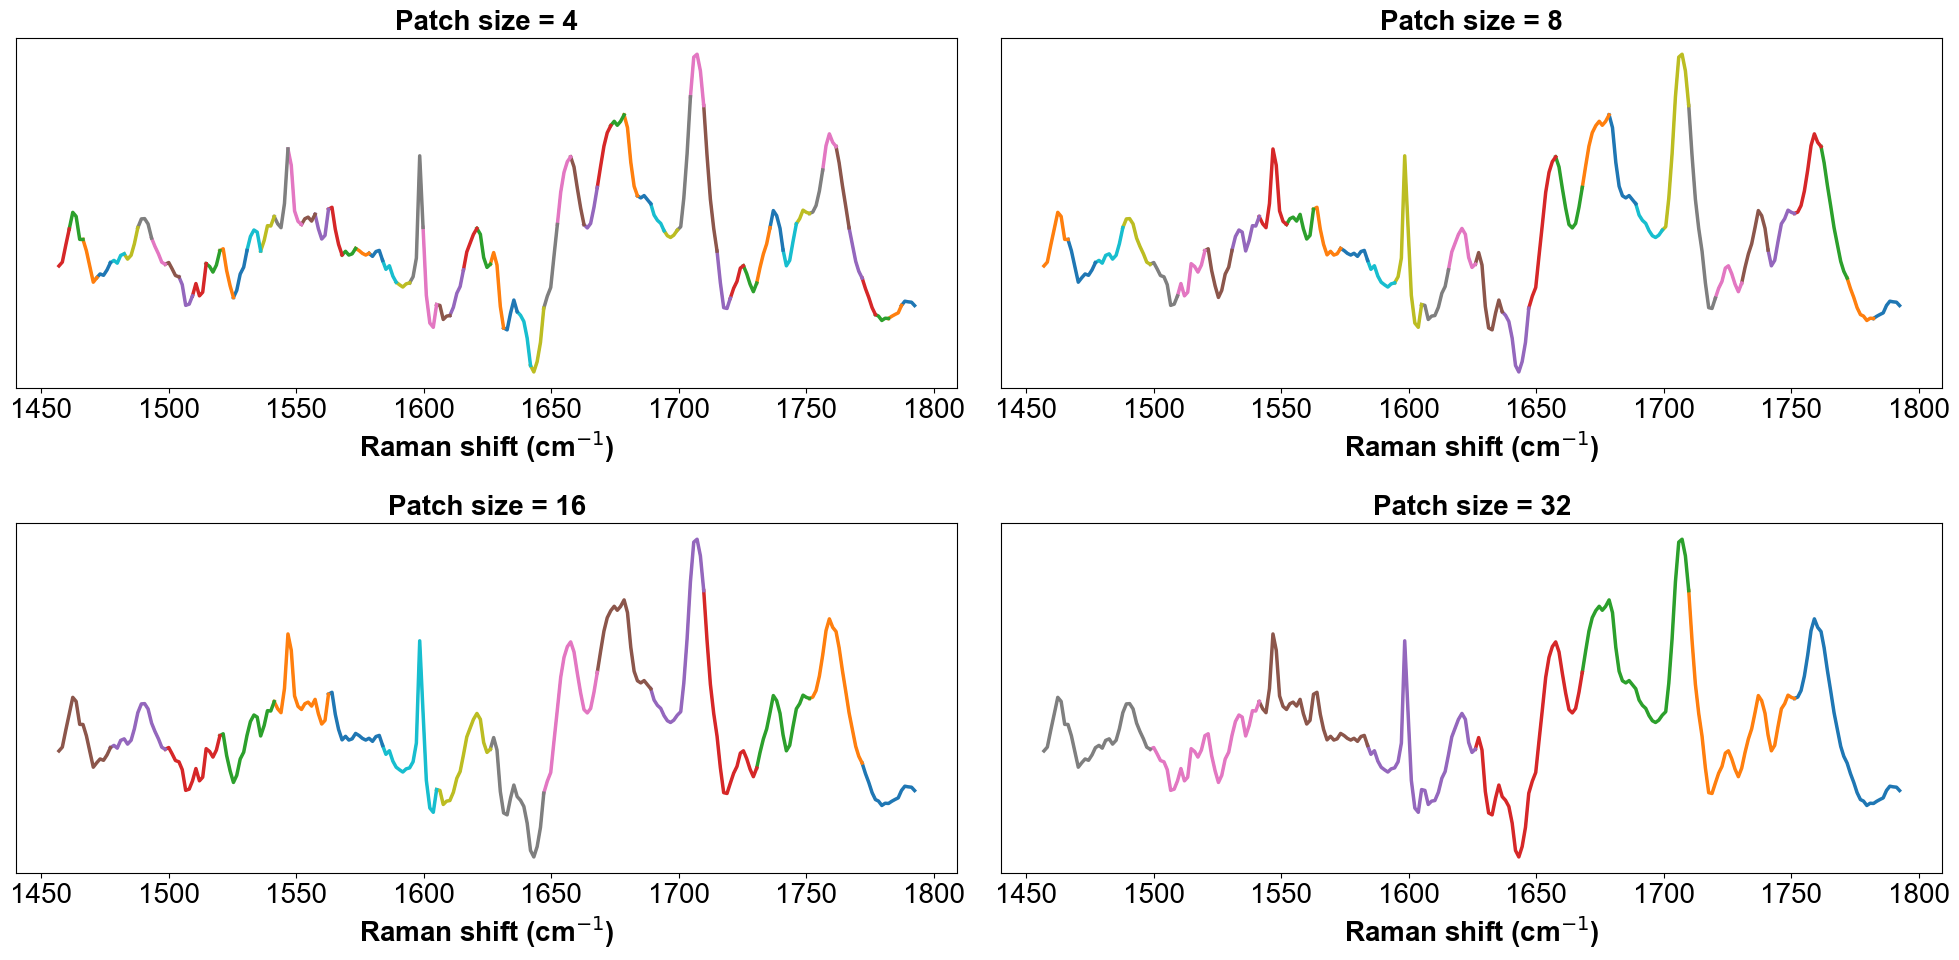

In [14]:

# set fontsize and fontstyle
plt.rcParams.update({'font.size': 20, 'font.family': 'Arial'})
# set the font of xlabel and ylabel
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

# plot data[0] in 16 patches
plt.figure(figsize=(20, 10), tight_layout=True)
# add color for each patch 

plt.subplot(221)
plt.plot(ynew, data.mean(0), color='k', alpha=0.5)

patch_size = 4
for i in range(256//patch_size):
    plt.plot(ynew[i*patch_size:(i+1)*patch_size+1], data.mean(0)[i*patch_size:(i+1)*patch_size+1], linewidth=2.5)

plt.xlabel("Raman shift (cm$^{-1}$)")
# plt.ylabel('intensity')
plt.yticks([])
plt.title(f'Patch size = {patch_size}')

plt.subplot(222)
plt.plot(ynew, data.mean(0), color='k', alpha=0.5)

patch_size = 8
for i in range(256//patch_size):
    plt.plot(ynew[i*patch_size:(i+1)*patch_size+1], data.mean(0)[i*patch_size:(i+1)*patch_size+1], linewidth=2.5)

plt.xlabel("Raman shift (cm$^{-1}$)")
# plt.ylabel('intensity')
plt.yticks([])
plt.title(f'Patch size = {patch_size}')

plt.subplot(223)
plt.plot(ynew, data.mean(0), color='k', alpha=0.5)

patch_size = 16
for i in range(256//patch_size):
    plt.plot(ynew[i*patch_size:(i+1)*patch_size+1], data.mean(0)[i*patch_size:(i+1)*patch_size+1], linewidth=2.5)

plt.xlabel("Raman shift (cm$^{-1}$)")

# plt.ylabel('intensity')
plt.yticks([])
plt.title(f'Patch size = {patch_size}')

plt.subplot(224)
plt.plot(ynew, data.mean(0), color='k', alpha=0.5)

patch_size = 32

for i in range(256//patch_size):
    plt.plot(ynew[i*patch_size:(i+1)*patch_size+1], data.mean(0)[i*patch_size:(i+1)*patch_size+1], linewidth=2.5)

plt.xlabel("Raman shift (cm$^{-1}$)")
# plt.ylabel('intensity')
plt.yticks([])
plt.title(f'Patch size = {patch_size}')
plt.savefig('patch_size.tif', dpi=300, bbox_inches='tight')
